In [1]:
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;
%matplotlib inline

We will be working on an item-similarity (content) based recommendor system 

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
# tab separated file: therefore sep = '\t'
df = pd.read_csv('u.data', sep= '\t', names = column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv('Movie_id_titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We want the above dataframes so that the dataframe above uses item_id from the one below to crossreference and add the titles to the above/new database 

In [7]:
df = pd.merge(df, movie_titles, on= 'item_id')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Exploratory Data Analysis

In [9]:
sns.set_style ('darkgrid');

let's create a dataframe which is ratings based; with average and number of ratings being the weights

In [19]:
# to get average rating values per title
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [20]:
# to get highest rated titles
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [21]:
# to get no. of ratings
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [22]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [23]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [28]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [29]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

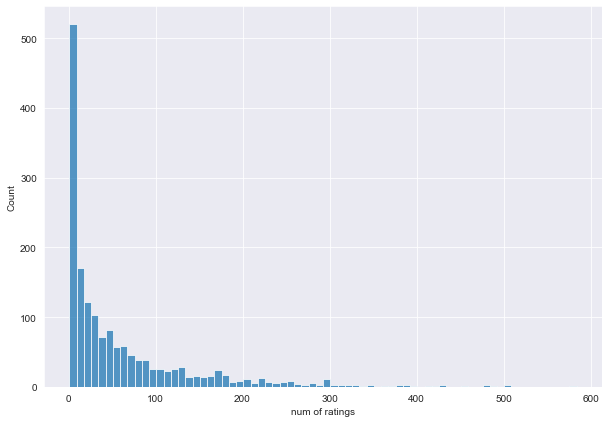

In [52]:
plt.figure(figsize = (10, 7))
sns.histplot(ratings['num of ratings'], bins = 70)

Most movies only have 0 or 1 rating!!!

<AxesSubplot:xlabel='rating', ylabel='Count'>

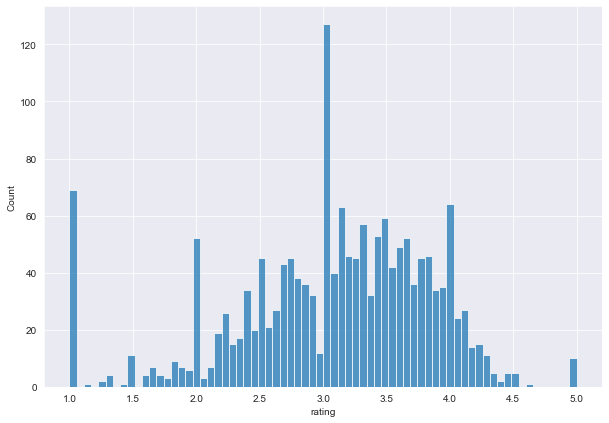

In [34]:
plt.figure(figsize = (10, 7))
sns.histplot(ratings['rating'], bins = 70)

Looks like a normal distribution! Most movies have a 3.0 rating which is understandable

Let's look at the average rating and no. of ratings using a jointplot

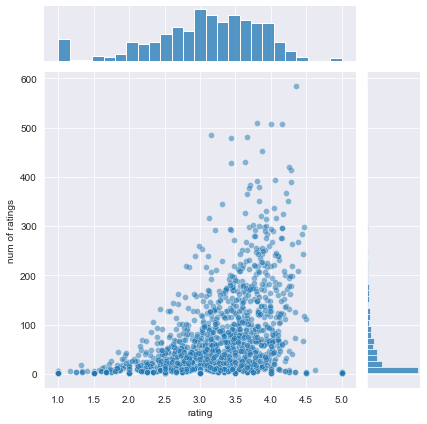

In [35]:
# IMPORTANT

sns.jointplot(x = 'rating', y = 'num of ratings', data = ratings, alpha = 0.5)

More number of ratings seem to be there for better movies. Which makes sense since the most marketed movies also have the most associated budget in total as well as for marketing; therefore we get the above graph.

## Now, we create our recommender system

In [36]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


<strong>Critical features:</strong> user_id, rating and title

Let's now create a pivot table of this

In [37]:
movMat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [39]:
movMat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<strong>NOTE:</strong> Most null values are here since most people have not seen most of the movies

In [40]:
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [43]:
scream_user_ratings = movMat['Scream (1996)'];
starwars_user_ratings = movMat['Star Wars (1977)'];

In [44]:
scream_user_ratings.head()

user_id
0    NaN
1    NaN
2    3.0
3    2.0
4    4.0
Name: Scream (1996), dtype: float64

Let's use the corrwith f(x) here to see the correlation between 2 values

In [45]:
# NOTE: this plots the corr() b/w 2 dataframes instead of corr() of features within a dataframe (i.e. the normal corr())
movMat.corrwith(scream_user_ratings)

C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.454859
1-900 (1994)                            -0.944911
101 Dalmatians (1996)                    0.124059
12 Angry Men (1957)                     -0.025659
187 (1997)                               0.382836
                                           ...   
Young Guns II (1990)                     0.521852
Young Poisoner's Handbook, The (1995)    0.554289
Zeus and Roxanne (1997)                  0.981981
unknown                                  0.827837
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [46]:
sim_to_scream = movMat.corrwith(scream_user_ratings);

In [47]:
sim_to_starwars = movMat.corrwith(starwars_user_ratings);

C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Shahbaz\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [48]:
corr_starwars = pd.DataFrame(sim_to_starwars, columns = ['Correlation']);
corr_starwars.dropna(inplace = True);

In [49]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [50]:
corr_scream = pd.DataFrame(sim_to_scream, columns = ['Correlation']);
corr_scream.dropna(inplace = True);

In [51]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


<strong>NOTE:</strong> Some of these weird correlations are due to that 1 dude who rated both, star wars and the movie(s) above with 5 stars.

We can fix this by setting a threshhold for number of ratings that go into our model

<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

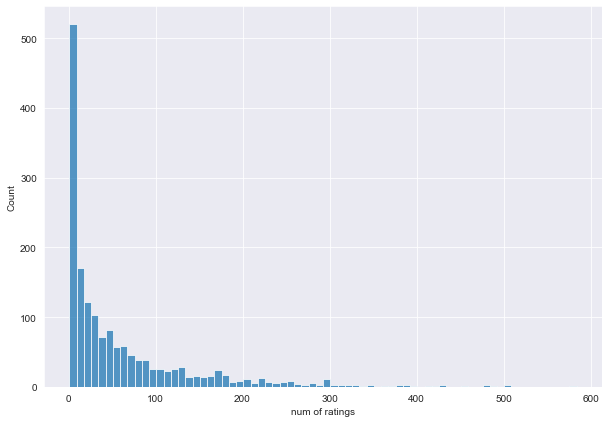

In [53]:
plt.figure(figsize = (10, 7))
sns.histplot(ratings['num of ratings'], bins = 70)

In [58]:
#corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [57]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


we can now filter out movies with ratings below a certain threshold

In [59]:
corr_starwars[corr_starwars['num of ratings'] > 100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [60]:
corr_scream = corr_scream.join(ratings['num of ratings'])

In [61]:
corr_scream[corr_scream['num of ratings'] > 100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111
